## 第3章　演習

In [2]:
!pip install statsmodels

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

### データ読み込み

In [4]:
auto = pd.read_csv('../data/Auto.csv')
auto.head()
auto.shape

(397, 9)

In [5]:
# horsepower = ?となっている行を削除
auto = auto[auto['horsepower'] != '?']
auto.shape

(392, 9)

(8)  
(a)  
目的変数：horsepower, 説明変数：mpgで単回帰に当てはめる

In [6]:
# StatsModelsを利用して当てはめ
x = sm.add_constant(auto['mpg'].values.astype(float))
y = auto['horsepower'].values.astype(float)
print(x[0])
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

[ 1. 18.]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 16 May 2023   Prob (F-statistic):           7.03e-81
Time:                        22:02:13   Log-Likelihood:                -1804.2
No. Observations:                 392   AIC:                             3612.
Df Residuals:                     390   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        194.4756      3.873     50.21

i)p値が十分小さいことから目的変数と説明変数間の関係が全くないという帰無仮説は棄却することができる。そのため、mpgとhourseの間には関係があると考えられる。  
ii)$R^2=0.606$となっていることから、約60%のデータを説明できているということができる。  
iii)係数が負の値をとっているため、horsepowerとmpg間の関係性は負となる  
iv)

In [7]:
x_test = np.array([1, 98])
x_test = sm.add_constant(x_test)
# print(x_test)
y_pred = results.get_prediction(x_test)
y_pred.summary_frame(alpha=0.05).iloc[1]

mean            -181.735384
mean_se           11.750717
mean_ci_lower   -204.838061
mean_ci_upper   -158.632707
obs_ci_lower    -234.614549
obs_ci_upper    -128.856219
Name: 1, dtype: float64

(b)

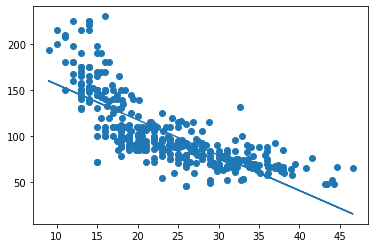

In [8]:
y_pred = results.predict(x)

plt.scatter(x[:, 1].reshape(-1, 1), y.reshape(-1, 1))
plt.plot(x[:, 1].reshape(-1, 1), y_pred.reshape(-1, 1))

(C)

c:\Users\rm006\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\rm006\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


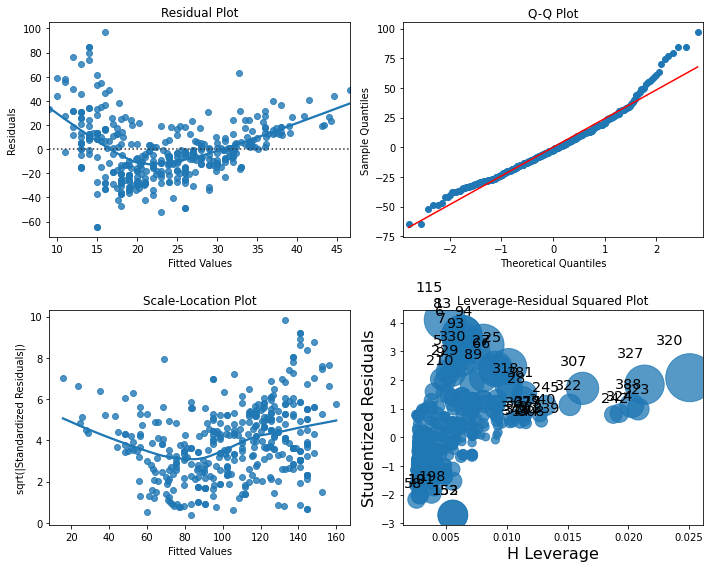

In [9]:
# 回帰診断図の作成
fig, axes = plt.subplots(2, 2, figsize=(10, 8))



# 残差プロット
sns.residplot(x[:, 1], results.resid, lowess=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual Plot')

# Q-Qプロット
sm.qqplot(results.resid, line='s', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# 標準化残差プロット
sns.regplot(results.fittedvalues, np.sqrt(np.abs(results.resid)), lowess=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('sqrt(|Standardized Residuals|)')
axes[1, 0].set_title('Scale-Location Plot')

# レバレッジ-残差二乗プロット
sm.graphics.influence_plot(results, ax=axes[1, 1])
axes[1, 1].set_title('Leverage-Residual Squared Plot')

plt.tight_layout()

上記の結果を確認したところ、いづれの結果から線形回帰によってうまくフィッティングができていない様子がうかがえる。そのため、説明変数と目的変数の関係性は非線形であることが予測される。

C:\Users\rm006\AppData\Local\Temp\ipykernel_20664\2955029970.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(auto, ax=ax)


array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='origin', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='cylinders', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
  

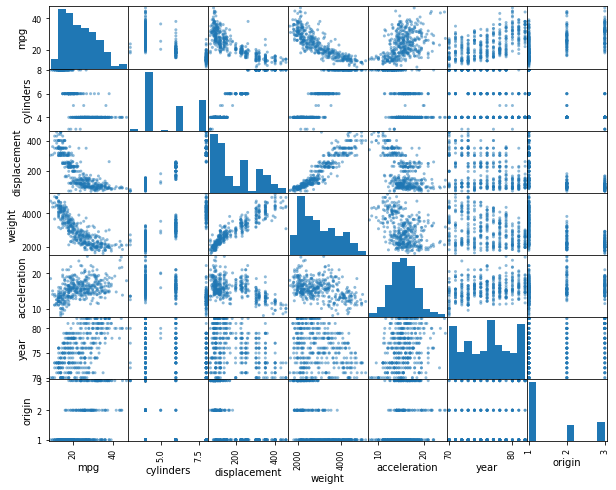

In [10]:
# 散布図行列
fig, ax = plt.subplots(figsize=(10, 8))
pd.plotting.scatter_matrix(auto, ax=ax)

<AxesSubplot:>

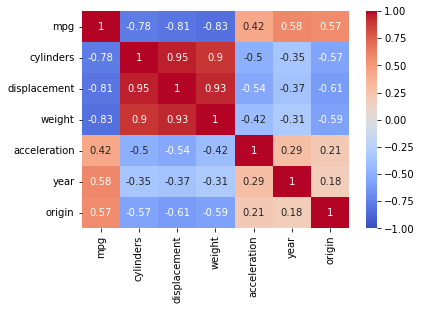

In [11]:
# 相関行列
auto_dropped = auto.drop(columns=['name'])
corr = auto.corr()
sns.heatmap(corr,vmax=1.0, vmin=-1.0, center=0.0, annot=True, cmap='coolwarm')

In [12]:
# 重回帰
# StatsModelsを利用して当てはめ
X = sm.add_constant(auto_dropped.drop(columns=['mpg']).values.astype(float))
y = auto_dropped['mpg'].values.astype(float)
print(auto_dropped.drop(columns=['mpg']).columns)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 16 May 2023   Prob (F-statistic):          2.04e-139
Time:                        22:02:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

p値から判断すると'cylinders', 'horsepower', 'acceleration'の3つ以外は十分小さな値をとっているため、統計的に優位に目的変数に関連がある変数であるといえる。  
yearの係数は0.75となっているため、1年経過するにmpgの値が0.75大きくなることを示している。

c:\Users\rm006\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\rm006\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


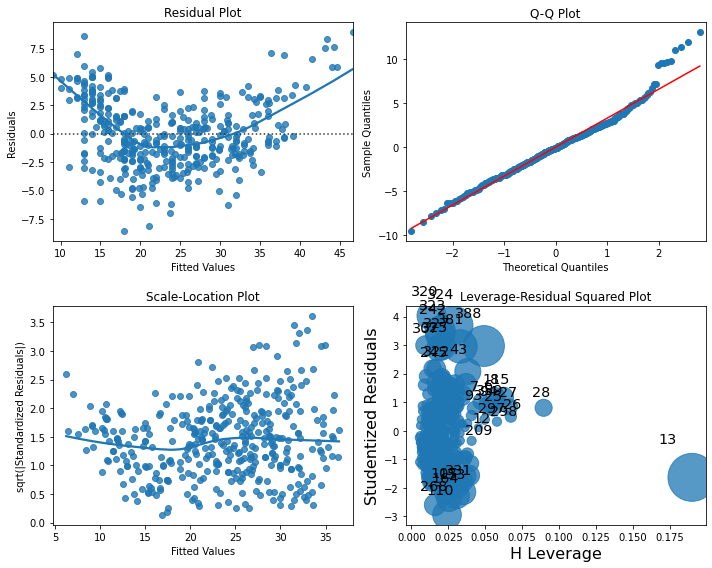

In [13]:
# 回帰診断図の作成
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 残差プロット
sns.residplot(x[:, 1], results.resid, lowess=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual Plot')

# Q-Qプロット
sm.qqplot(results.resid, line='s', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# 標準化残差プロット
sns.regplot(results.fittedvalues, np.sqrt(np.abs(results.resid)), lowess=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('sqrt(|Standardized Residuals|)')
axes[1, 0].set_title('Scale-Location Plot')

# レバレッジ-残差二乗プロット
sm.graphics.influence_plot(results, ax=axes[1, 1])
axes[1, 1].set_title('Leverage-Residual Squared Plot')

plt.tight_layout()

(e)交互作用項の検討  
相関係数が高い組み合わせの'cylinders':'displacement', 'cylinders':'weight', 'displacement':'weightの3つを交互作用項として追加する

In [14]:
# 重回帰(交互作用項を考慮)
# 交互作用項作成
auto_interaction = auto_dropped.copy()
auto_interaction['cyl:disp'] = auto_interaction['cylinders'] * auto_interaction['displacement']
auto_interaction['cyl:wei'] = auto_interaction['cylinders'] * auto_interaction['weight']
auto_interaction['disp:wei'] = auto_interaction['displacement'] * auto_interaction['weight']

# StatsModelsを利用して当てはめ
X = sm.add_constant(auto_interaction.drop(columns=['mpg']).values.astype(float))
y = auto_interaction['mpg'].values.astype(float)
print(auto_interaction.drop(columns=['mpg']).columns)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin', 'cyl:disp', 'cyl:wei', 'disp:wei'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     232.0
Date:                Tue, 16 May 2023   Prob (F-statistic):          2.98e-155
Time:                        22:02:17   Log-Likelihood:                -977.34
No. Observations:                 392   AIC:                             1977.
Df Residuals:                     381   BIC:                             2020.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>

p値から判断すると、Weightとplacemnetを掛け合わせた交互作用項については、統計的に優位であるといえる。

C:\Users\rm006\AppData\Local\Temp\ipykernel_20664\3105019286.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(auto_scaled, ax=ax)


array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower_squared', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower_log', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower_root', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='horsepower'>,
        <AxesSubplot:xlabel='horsepower', ylabel='horsepower'>,
        <AxesSubplot:xlabel='horsepower_squared', ylabel='horsepower'>,
        <AxesSubplot:xlabel='horsepower_log', ylabel='horsepower'>,
        <AxesSubplot:xlabel='horsepower_root', ylabel='horsepower'>],
       [<AxesSubplot:xlabel='mpg', ylabel='horsepower_squared'>,
        <AxesSubplot:xlabel='horsepower', ylabel='horsepower_squared'>,
        <AxesSubplot:xlabel='horsepower_squared', ylabel='horsepower_squared'>,
        <AxesSubplot:xlabel='horsepower_log', ylabel='horsepower_squared'>,
        <AxesSubplot:xlabel='horsepower_root', ylabel='horsepower_squared'>],
  

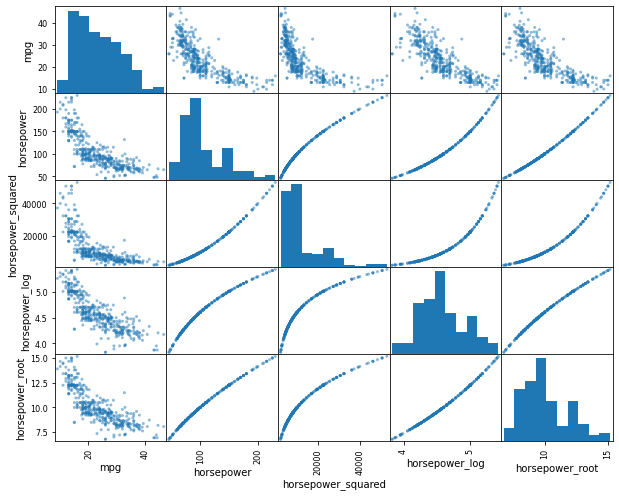

In [15]:
# 説明変数を変換し、目的変数との関係を考察
# hoursepowerを例にとって検討する
auto_scaled = auto.copy().drop(columns=['cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'name'])
auto_scaled['horsepower_squared'] = auto['horsepower'].astype(float) ** 2
auto_scaled['horsepower_log'] = np.log(auto['horsepower'].astype(float))
auto_scaled['horsepower_root'] = np.sqrt(auto['horsepower'].astype(float))
auto_scaled['horsepower'] = auto['horsepower'].astype(float)

# 散布図行列
fig, ax = plt.subplots(figsize=(10, 8))
pd.plotting.scatter_matrix(auto_scaled, ax=ax)

<AxesSubplot:>

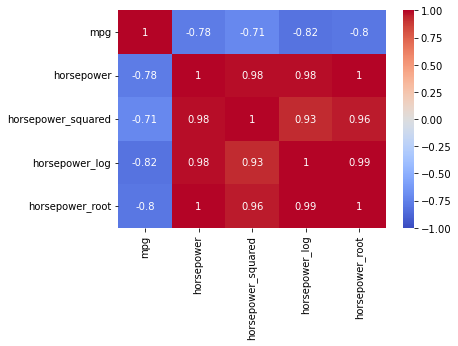

In [16]:
# 相関行列
corr = auto_scaled.corr()
sns.heatmap(corr,vmax=1.0, vmin=-1.0, center=0.0, annot=True, cmap='coolwarm')

horsepowerに関して変換処理したところ、logをとることで、MPGとの相関がより大きくなることが確認できた。horsepowerとMpgｈは散布図の段階で非線形にも思われるPlotがみられていたが、変換処理ののちの相関分析によって、非線形な関係がある可能性が高いことが分かった。


(10)
Carseatsデータは以下URLからダウンロード  
https://r-data.pmagunia.com/dataset/r-dataset-package-islr-carseats

In [17]:
carseats = pd.read_csv('../data/Carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [28]:
# label encoding
label_encoder = LabelEncoder()
carseats['Urban'] = label_encoder.fit_transform(carseats['Urban'])
carseats['US'] = label_encoder.fit_transform(carseats['US'])

In [30]:
# (a)重回帰を適用
X = sm.add_constant(carseats[['Price', 'Urban', 'US']]).values.astype(float)
y = carseats['Sales'].values.astype(float)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 16 May 2023   Prob (F-statistic):           2.39e-23
Time:                        22:10:31   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

(b)係数について解釈  
priceが大きくなるにつれて、Salesは0.0545の割合ずつ減少する。UrbanとUSについては、質的変数となり、Urban＝Yesとなる場合、salesは-0.0219となり、US=Yesとなる場合、salesは+1.2006となる。  
  
(c)モデルを表す式
$$ Sales = 13.0435 -0.0545 \times Price - 0.0.0219 \times Urban + 1.2006 \times US + \epsilon $$  
  
(d)帰無仮説を検討
PriceとUSについてはP値が十分小さいため、説明変数と目的変数の間に全く関係がないという帰無仮説を棄却する。

In [31]:
# (e)説明変数をPriceとUSのみにして重回帰を適用
X = sm.add_constant(carseats[['Price', 'US']]).values.astype(float)
y = carseats['Sales'].values.astype(float)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 16 May 2023   Prob (F-statistic):           2.66e-24
Time:                        22:22:30   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

(f)a, eで求めた重回帰モデルはどちらも$R^2=0.239$となっており、精度は同程度となる。  
  
(g)信頼性区間
eの結果参照

c:\Users\rm006\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\rm006\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


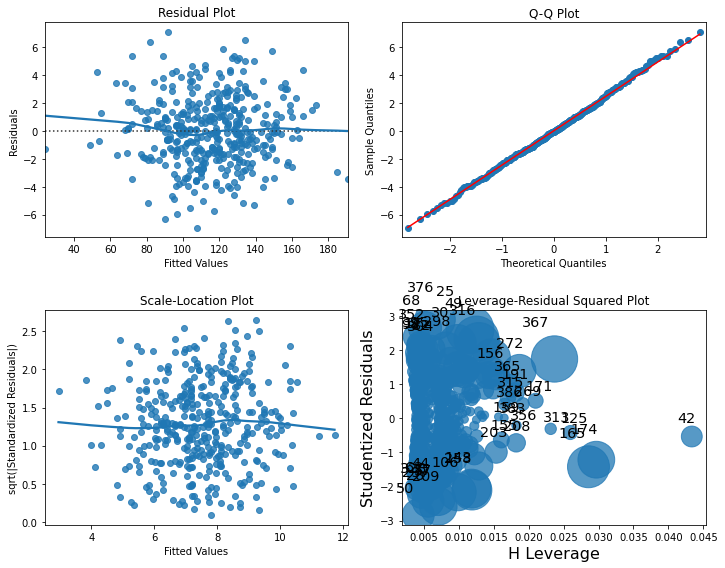

In [33]:
# (h)外れ値やてこ値が大きいデータ
# 回帰診断図の作成
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 残差プロット
sns.residplot(X[:, 1], results.resid, lowess=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual Plot')

# Q-Qプロット
sm.qqplot(results.resid, line='s', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# 標準化残差プロット
sns.regplot(results.fittedvalues, np.sqrt(np.abs(results.resid)), lowess=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('sqrt(|Standardized Residuals|)')
axes[1, 0].set_title('Scale-Location Plot')

# レバレッジ-残差二乗プロット
sm.graphics.influence_plot(results, ax=axes[1, 1])
axes[1, 1].set_title('Leverage-Residual Squared Plot')

plt.tight_layout()